In [1]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# EDA

<Axes: xlabel='TV', ylabel='Sales'>

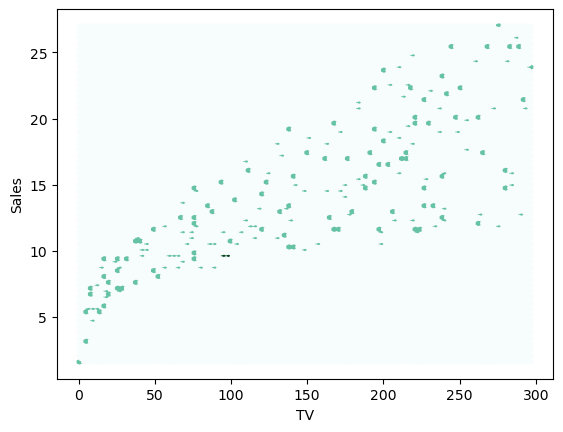

In [8]:
#analysing each column
df.plot(kind='hexbin',x='TV',y='Sales',colorbar=False)

<Axes: xlabel='Newspaper', ylabel='Sales'>

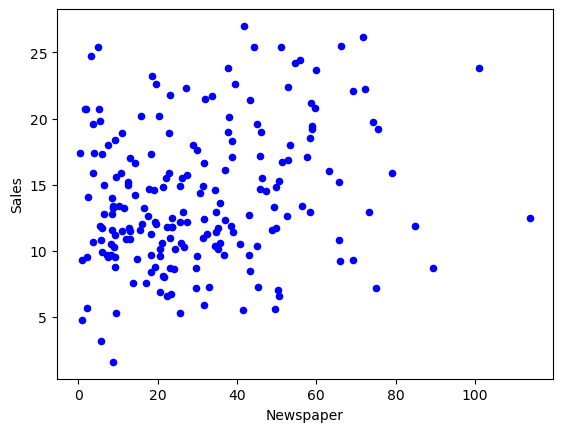

In [9]:
df.plot(kind='scatter',x='Newspaper',y='Sales',color='b')

<Axes: xlabel='Radio', ylabel='Sales'>

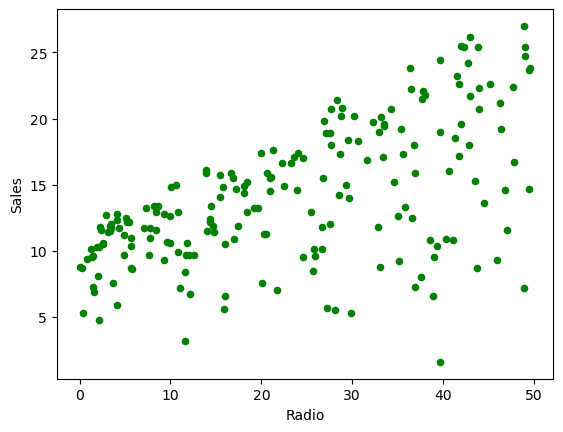

In [10]:
df.plot(kind='scatter',x='Radio',y='Sales',color='g')

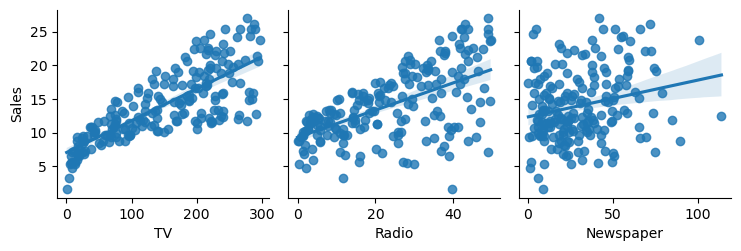

In [11]:
#pairplot
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')

<Axes: >

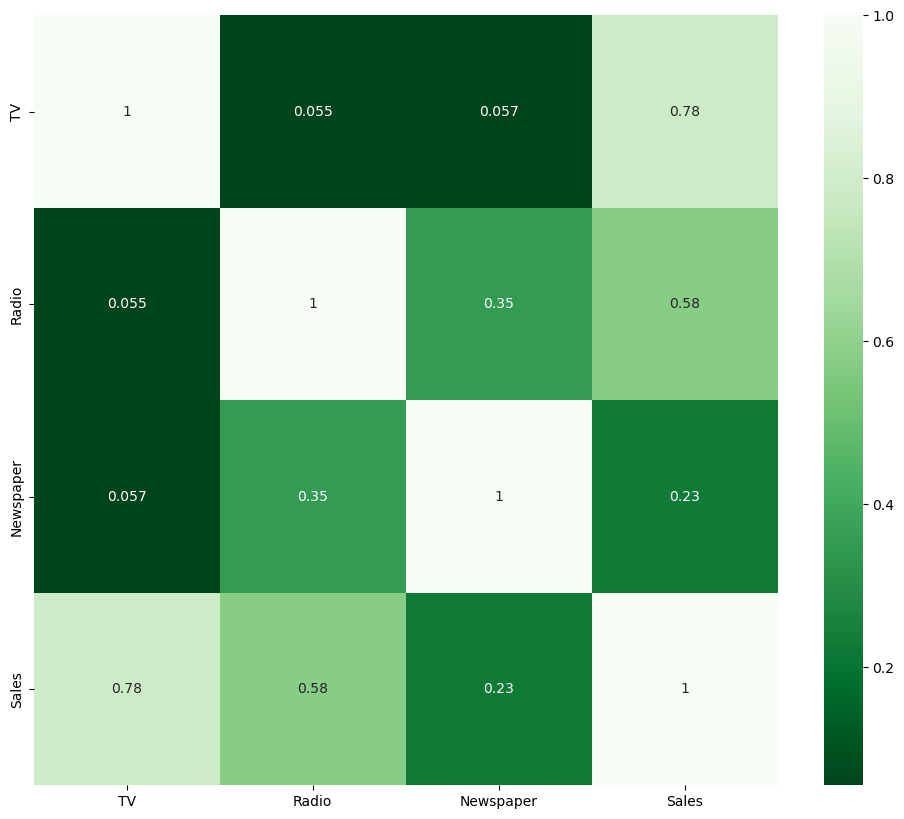

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(['Unnamed: 0'],axis=1).corr(),annot=True,cmap='Greens_r')

Outlier Removal

In [13]:
def removeOutliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    upper_array = np.where(df[col]>=upper)[0]
    lower_array = np.where(df[col]<=lower)[0]
    mean = df[((df[col] >= lower) | (df[col] <= upper))][col].mean()
    df.loc[((df[col] < lower) | (df[col] > upper)), col] = mean

In [14]:
#removing outliers
for i in df.columns:
    removeOutliers(i)

removing duplicate values

In [15]:
def check_duplicate(df):
    if df.duplicated().all():
        return 'Duplicate data present in the DataFrame'
    else:
        return 'No duplicate data found'

In [16]:
check_duplicate(df)

'No duplicate data found'

# Data Preparation

In [17]:
X=df.drop(['Sales'],axis=1)
y=df['Sales']

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Model Building, Prediction and Accuracy

In [19]:
from sklearn.linear_model  import LinearRegression
model=LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
#prediction
y_pred=model.predict(X_test)
y_pred

array([10.25760008,  7.31146047,  7.01108575, 24.04638181, 11.8321454 ,
        6.35484313, 12.94462588, 15.02358164, 10.92572069, 16.2404217 ,
       22.92941777,  9.07761835, 10.30727624, 15.38629831, 11.64126321,
       12.40338344, 18.94331324, 10.7494828 , 16.02883668, 17.3791412 ,
       23.81564846,  9.51973557, 15.25136701, 12.24440795,  5.81524144,
       15.21702779, 12.12692047, 20.75877971, 13.36944178,  9.15604209,
       13.3144929 , 21.46000668, 18.00434403, 21.14881819,  6.72370637,
        5.95311328,  7.80907774, 13.18801164, 14.72296121,  6.17822551])

In [22]:
#checking accuracy
from sklearn import metrics

print('MAE : ',metrics.mean_absolute_error(y_pred,y_test))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_pred,y_test)))
print('r-Squared : ',metrics.r2_score(y_pred,y_test))

MAE :  1.421930426809815
RMSE :  1.1924472427784027
r-Squared :  0.8276027530774985
